In [1]:
#dependencies
import matplotlib.pyplot as plt, pandas as pd, numpy as np

In [2]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#read each file to df
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [4]:
#merge datasets on city
pyber_data_df = pd.merge(ride_data_df,city_data_df, on=["city","city"], how="left")

In [5]:
#calc items for Challenge 5
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
#calc items for Challenge 5
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#calc items for Challenge 5
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#calc items for Challenge 5
avg_fare_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [9]:
#calc items for Challenge 5
avg_fare_driver = total_fares/total_drivers
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#create summary df and perform formatting
summary_df = pd.DataFrame()
summary_df["Total Rides"] = total_rides
summary_df["Total Drivers"] = total_drivers
summary_df["Total Fares"] = total_fares
summary_df["Average Fare per Ride"] = avg_fare_ride
summary_df["Average Fare per Driver"] = avg_fare_driver
summary_df.index.name = None

summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

In [11]:
#display summary dataframe
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [12]:
#challenge part 2 rename columns
pyber_data_df = pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
#challenge set index to date
pyber_data_df.set_index(["Date"])

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [13]:
import datetime as dt

In [14]:
#step 2-5: create a copy for the challenge with indexing
pyber_chal_df = pyber_data_df.copy()
pyber_chal_df = pyber_chal_df.drop(columns=["City","Ride Id", "No. Drivers"])
pyber_chal_df = pyber_chal_df.set_index(["Date"])

In [15]:
#step 7
total_fares_2 = pyber_chal_df.groupby(["City Type"]).sum()["Fare"]
total_fares_2

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [16]:
#step 8: reset index
pyber_chal_df = pyber_chal_df.reset_index()

In [17]:
#step 9: create the pivot table
pyber_chal_pivot = pd.pivot_table(pyber_chal_df, values=['Fare'], index=['Date'],
                    columns=['City Type'], aggfunc=np.sum)

In [18]:
#step 10: create the new df
pyber_chal_pivot = pyber_chal_pivot.loc['2019-01-01':'2019-04-28']
pyber_chal_pivot.head()

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [19]:
#reset index to datetimeindex
pyber_chal_pivot.index = pd.to_datetime(pyber_chal_pivot.index)

In [20]:
#step 11: resample with binning by week
pyber_chal_pivot = pyber_chal_pivot.resample('W-MON').sum()

In [21]:
pyber_chal_pivot2 = pyber_chal_pivot.copy()
pyber_chal_pivot2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-07 to 2019-04-29
Freq: W-MON
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Fare, Rural)     17 non-null     float64
 1   (Fare, Suburban)  17 non-null     float64
 2   (Fare, Urban)     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


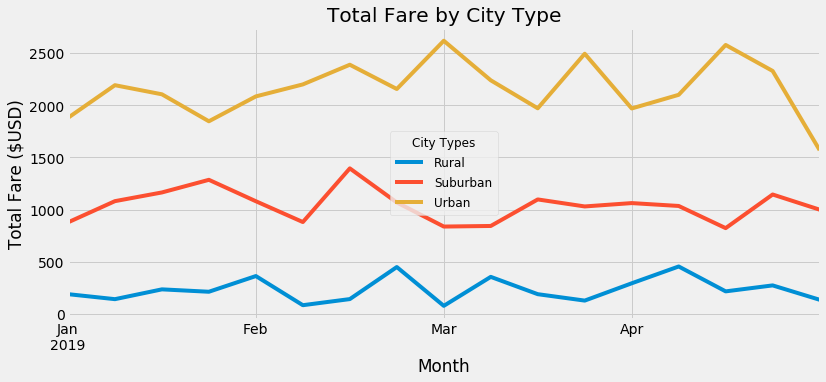

In [22]:
#step 12: create chart
plt.style.use('fivethirtyeight')
ax = pyber_chal_pivot.plot(figsize=(12,5))
ax.set_xlabel("Month")
ax.set_ylabel("Total Fare ($USD)")
ax.set_title("Total Fare by City Type")
#set legend parameters
lgnd = ax.legend(loc="center", title="City Types")
lgnd.get_texts()[0].set_fontsize(12)
lgnd.get_texts()[0].set_text("Rural")
lgnd.get_texts()[1].set_text("Suburban")
lgnd.get_texts()[2].set_text("Urban")
lgnd.get_title().set_fontsize(12)

plt.savefig("Analysis\FigChallenge_TotalFarebyCityType_Weekly")